In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F..."
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...


In [5]:
df.to_csv("data/BA_review.csv", index=False)

In [6]:
df.shape

(1000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type Of Traveller       998 non-null    object 
 1   Seat Type               1000 non-null   object 
 2   Route                   997 non-null    object 
 3   Date Flown              1000 non-null   object 
 4   Seat Comfort            912 non-null    float64
 5   Cabin Staff Service     905 non-null    float64
 6   Food & Beverages        787 non-null    float64
 7   Inflight Entertainment  539 non-null    float64
 8   Ground Service          941 non-null    float64
 9   Wifi & Connectivity     284 non-null    float64
 10  Value For Money         1000 non-null   int64  
 11  Recommended             1000 non-null   object 
 12  Aircraft                540 non-null    object 
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

In [8]:
df['Verified'] = df['reviews'].str.contains('✅ Trip Verified')
df['Not Verified'] = df['reviews'].str.contains('Not Verified')
df['Verified'] = df['Verified'].astype('int')
df['Not Verified'] = df['Not Verified'].astype('int')

In [9]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Verified,Not Verified
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...,1,0
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...,0,1
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...,0,1


In [10]:
print('Trip Verified: ', df['Verified'].sum())
print('Not Verified: ', df['Not Verified'].sum())

Trip Verified:  791
Not Verified:  209


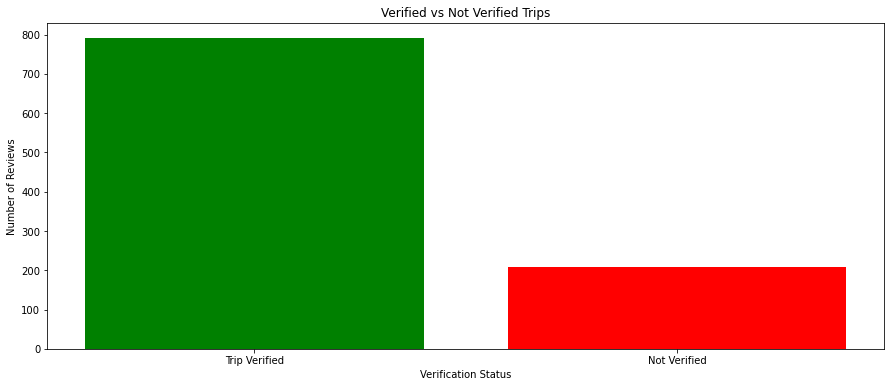

In [11]:
labels = ['Trip Verified', 'Not Verified']
counts = [df['Verified'].sum(), df['Not Verified'].sum()]

plt.figure(figsize=(15, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Verification Status')
plt.ylabel('Number of Reviews')
plt.title('Verified vs Not Verified Trips')
plt.show()

In [12]:
df['all_reviews'] = df['reviews'].str.split('|').str[1].str.strip()
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Verified,Not Verified,all_reviews
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ..."
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...


In [13]:
import gensim

df['text_clean'] = df['all_reviews'].apply(lambda x: gensim.utils.simple_preprocess(x))
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Verified,Not Verified,all_reviews,text_clean
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ...","[had, flight, from, miami, florida, to, dublin..."
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...,"[we, started, our, day, with, ba, in, prague, ..."
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...,"[fly, british, airways, weekly, not, because, ..."
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ..."
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, hours, p..."


In [14]:
import spacy

model_name = 'en_core_web_sm'

spacy.cli.download(model_name)

nlp = spacy.load("en_core_web_sm")

def lemmatize_words(word_list):
    doc = ' '.join(word_list)
    doc = nlp(doc)
    lemmatized_words = [token.lemma_ for token in doc]
    return lemmatized_words

df['lemmatized_text'] = df['text_clean'].apply(lemmatize_words)
df.head()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Verified,Not Verified,all_reviews,text_clean,lemmatized_text
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ...","[had, flight, from, miami, florida, to, dublin...","[have, flight, from, miami, florida, to, dubli..."
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...,"[we, started, our, day, with, ba, in, prague, ...","[we, start, our, day, with, ba, in, prague, th..."
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...,"[fly, british, airways, weekly, not, because, ...","[fly, british, airways, weekly, not, because, ..."
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, be, ok, until, our, connect, flig..."
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, hours, p...","[my, initial, flight, be, cancel, hour, prior,..."


In [15]:
def join_word_to_sentence(word_list):
    return ' '.join(word_list)

df['lemmatized_sentence'] = df['lemmatized_text'].apply(join_word_to_sentence)
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Verified,Not Verified,all_reviews,text_clean,lemmatized_text,lemmatized_sentence
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,1,no,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ...","[had, flight, from, miami, florida, to, dublin...","[have, flight, from, miami, florida, to, dubli...",have flight from miami florida to dublin irela...
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,1,no,NaN,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...,"[we, started, our, day, with, ba, in, prague, ...","[we, start, our, day, with, ba, in, prague, th...",we start our day with ba in prague the flight ...
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...,"[fly, british, airways, weekly, not, because, ...","[fly, british, airways, weekly, not, because, ...",fly british airways weekly not because want to...
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,3,no,NaN,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, be, ok, until, our, connect, flig...",everything be ok until our connect flight in l...
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,1,no,A350,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, hours, p...","[my, initial, flight, be, cancel, hour, prior,...",my initial flight be cancel hour prior the fli...


In [16]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [17]:
df['sentiment'] = df['lemmatized_sentence'].apply(lambda x: sentiment_pipeline(x, max_length=512, truncation=True)[0]["label"])
df['confidence'] = df['lemmatized_sentence'].apply(lambda x: sentiment_pipeline(x, max_length=512, truncation=True)[0]["score"])

df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,...,Aircraft,reviews,Verified,Not Verified,all_reviews,text_clean,lemmatized_text,lemmatized_sentence,sentiment,confidence
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,...,NaN,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ...","[had, flight, from, miami, florida, to, dublin...","[have, flight, from, miami, florida, to, dubli...",have flight from miami florida to dublin irela...,NEGATIVE,0.997876
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,...,NaN,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...,"[we, started, our, day, with, ba, in, prague, ...","[we, start, our, day, with, ba, in, prague, th...",we start our day with ba in prague the flight ...,NEGATIVE,0.997121
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...,"[fly, british, airways, weekly, not, because, ...","[fly, british, airways, weekly, not, because, ...",fly british airways weekly not because want to...,NEGATIVE,0.998861
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,...,NaN,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, be, ok, until, our, connect, flig...",everything be ok until our connect flight in l...,NEGATIVE,0.999183
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,...,A350,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, hours, p...","[my, initial, flight, be, cancel, hour, prior,...",my initial flight be cancel hour prior the fli...,NEGATIVE,0.954525


In [40]:
seat_avg = df['Seat Comfort'].sum() / len(df['Seat Comfort'])
cabin_avg = df['Cabin Staff Service'].sum() / len(df['Cabin Staff Service'])
Food_avg = df['Food & Beverages'].sum() / len(df['Food & Beverages'])
Ground_service_avg = df['Ground Service'].sum() / len(df['Ground Service'])
Value_money_avg = df['Value For Money'].sum() / len(df['Value For Money'])

print("Seat Average Rating: ", seat_avg)
print("Cabin Average Rating: ", cabin_avg)
print("Food Average Rating: ", Food_avg)
print("Ground Service Average Rating: ", Ground_service_avg)
print("Value for money Average Rating: ", Value_money_avg)

Seat Average Rating:  2.531
Cabin Average Rating:  2.895
Food Average Rating:  2.128
Ground Service Average Rating:  2.492
Value for money Average Rating:  2.421


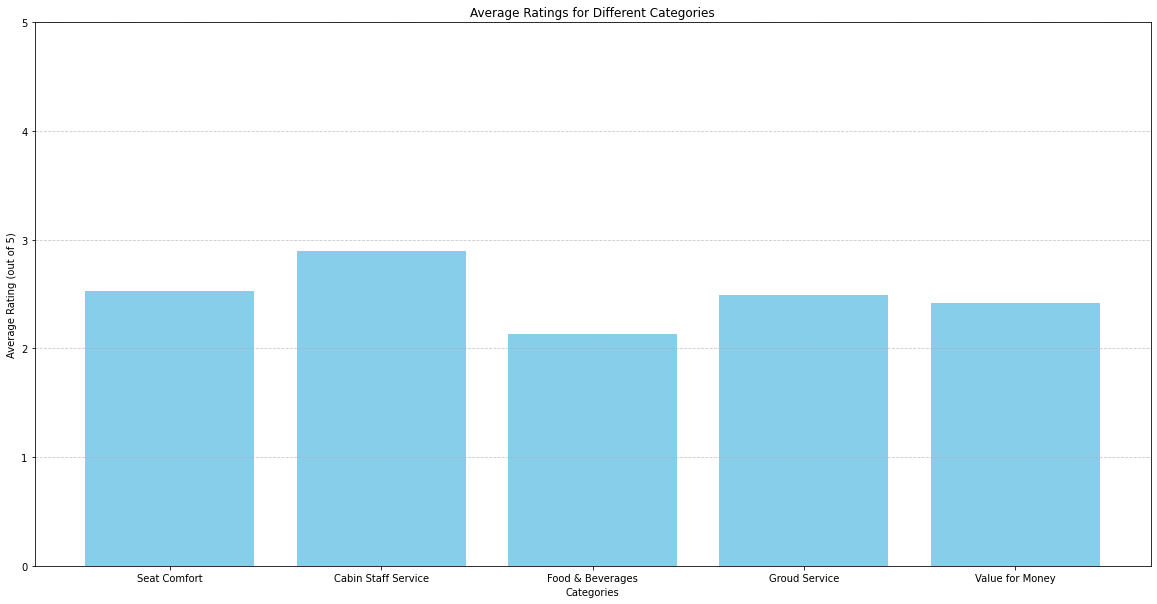

In [45]:
categories = ["Seat Comfort","Cabin Staff Service","Food & Beverages", "Groud Service", "Value for Money"]
average_ratings = [2.531, 2.895, 2.128, 2.492, 2.421]

plt.figure(figsize=(20, 10))
plt.bar(categories, average_ratings, color='skyblue')
plt.ylim(0, 5)  # Set the y-axis limit to match the 5-star rating scale
plt.xlabel("Categories")
plt.ylabel("Average Rating (out of 5)")
plt.title("Average Ratings for Different Categories")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
df['sentiment'].value_counts()

NEGATIVE    760
POSITIVE    240
Name: sentiment, dtype: int64

In [19]:
df.groupby('Verified')['sentiment'].value_counts()

Verified  sentiment
0         NEGATIVE     168
          POSITIVE      41
1         NEGATIVE     592
          POSITIVE     199
Name: sentiment, dtype: int64

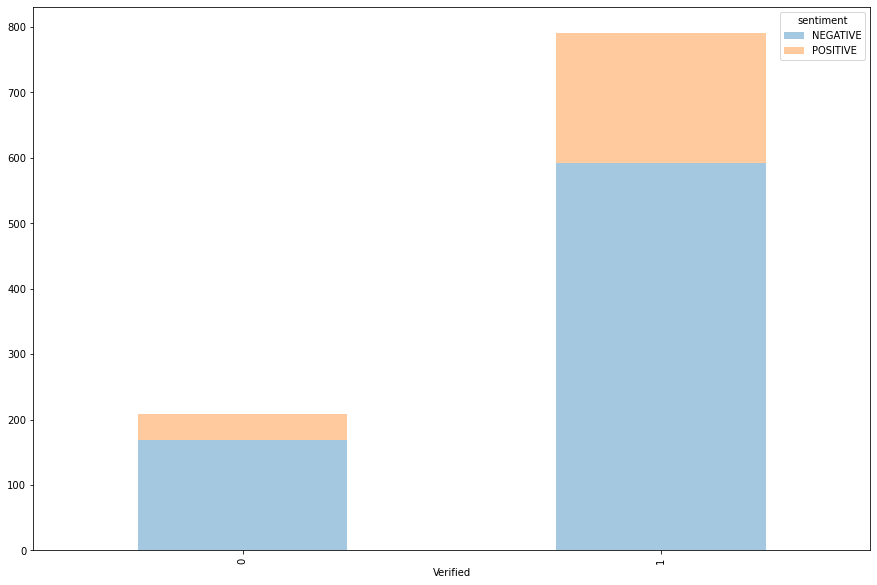

In [53]:
df.groupby('Verified')['sentiment'].value_counts().unstack().plot.bar(stacked=True, figsize=(15,10), alpha=0.4);
plt.show()

<h2> Satisfaction of Customer

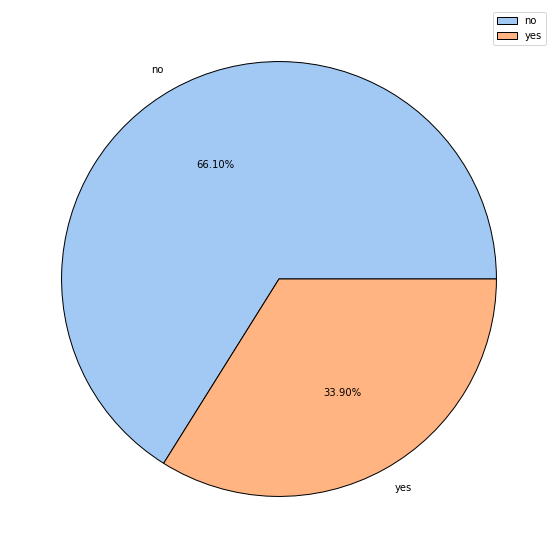

In [21]:
plt.figure(figsize=(20, 10))
sc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(sc['reviews'], labels=sc['Recommended'],autopct='%.2f%%',colors = sns.color_palette('pastel'),wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

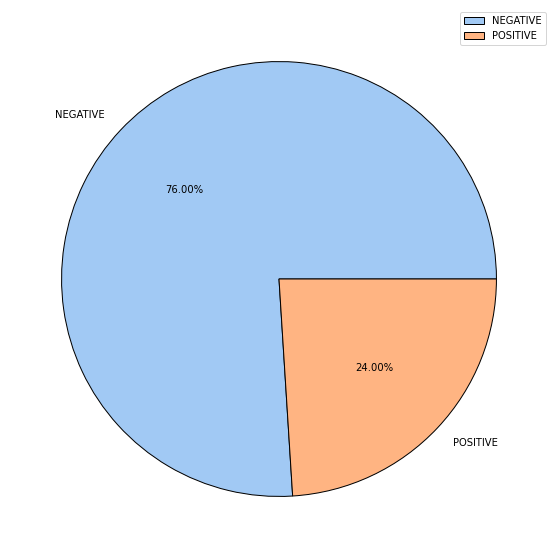

In [49]:
plt.figure(figsize=(20, 10))
sc = df.groupby('sentiment')['reviews'].count().reset_index()
plt.pie(sc['reviews'], labels=sc['sentiment'],autopct='%.2f%%',colors = sns.color_palette('pastel'),wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [22]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Verified,Not Verified,confidence
count,575.000000,568.000000,471.000000,328.000000,603.000000,176.000000,661.000000,661.000000,661.000000,661.000000
mean,2.088696,2.417254,1.859873,2.143293,1.859038,1.477273,1.535552,0.765507,0.234493,0.991519
std,1.085601,1.312073,1.062666,1.239346,1.191762,0.955911,0.829763,0.424002,0.424002,0.035735
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.506416
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.996198
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.998339
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.999095
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.999756


In [28]:
df_sen = df[df['sentiment']== 'NEGATIVE']
df_sen.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Verified,Not Verified,confidence
count,675.000000,668.000000,565.000000,395.000000,703.000000,213.000000,760.000000,760.000000,760.000000,760.000000
mean,2.287407,2.682635,2.125664,2.351899,2.096728,1.769953,1.838158,0.778947,0.221053,0.986688
std,1.198567,1.398606,1.213165,1.315744,1.316898,1.228067,1.138090,0.415229,0.415229,0.048057
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.506416
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.994528
50%,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.998019
75%,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,0.000000,0.999002
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.999756


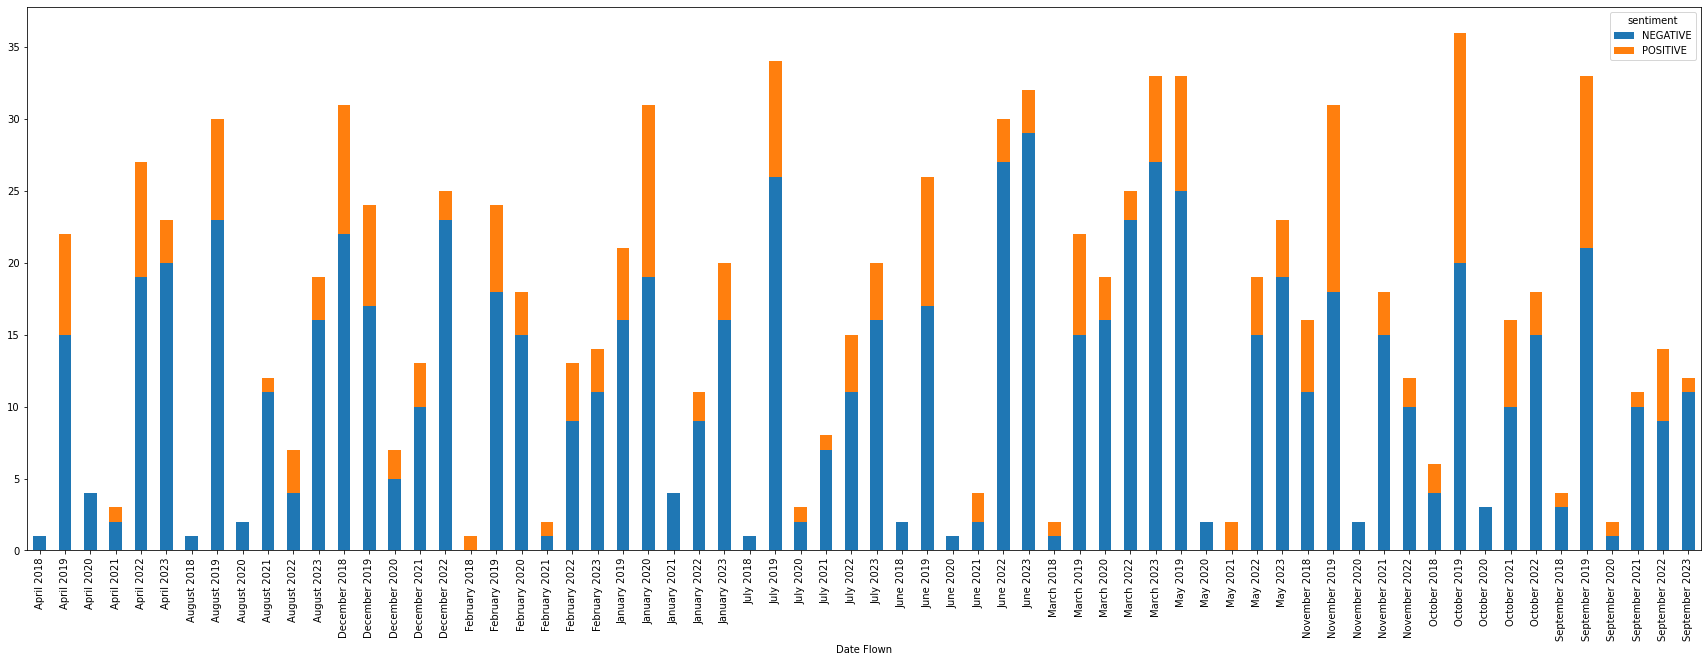

In [23]:
df.groupby('Date Flown')['sentiment'].value_counts().unstack().plot.bar(stacked=True, figsize=(30,10));

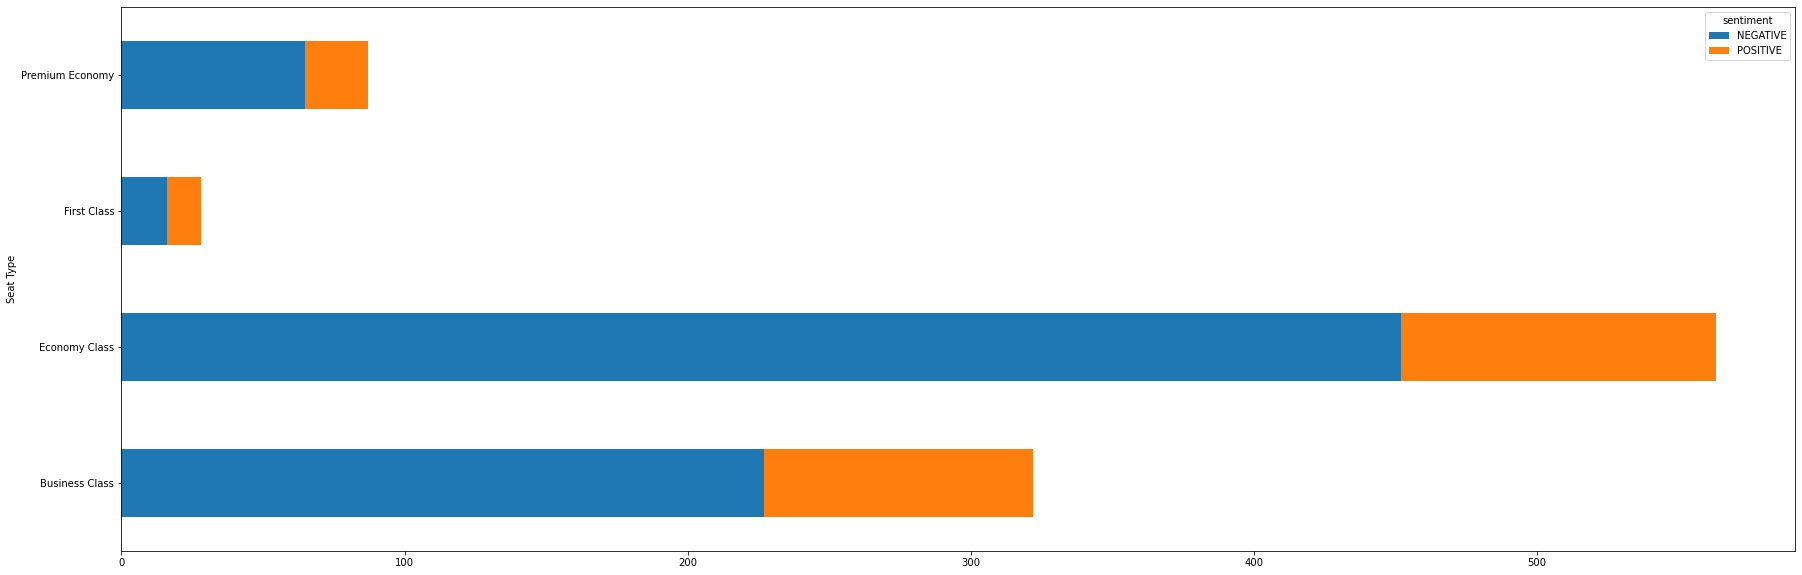

In [33]:
df.groupby('Seat Type')['sentiment'].value_counts().unstack().plot.barh(stacked=True, figsize=(30,10));

In [55]:
df.groupby('Seat Type')['sentiment'].value_counts(normalize=True)

Seat Type        sentiment
Business Class   NEGATIVE     0.704969
                 POSITIVE     0.295031
Economy Class    NEGATIVE     0.802842
                 POSITIVE     0.197158
First Class      NEGATIVE     0.571429
                 POSITIVE     0.428571
Premium Economy  NEGATIVE     0.747126
                 POSITIVE     0.252874
Name: sentiment, dtype: float64

In [65]:
df.groupby('sentiment')['Type Of Traveller'].value_counts(normalize=True)

sentiment  Type Of Traveller
NEGATIVE   Couple Leisure       0.331135
           Solo Leisure         0.292876
           Business             0.217678
           Family Leisure       0.158311
POSITIVE   Solo Leisure         0.366667
           Couple Leisure       0.354167
           Family Leisure       0.154167
           Business             0.125000
Name: Type Of Traveller, dtype: float64

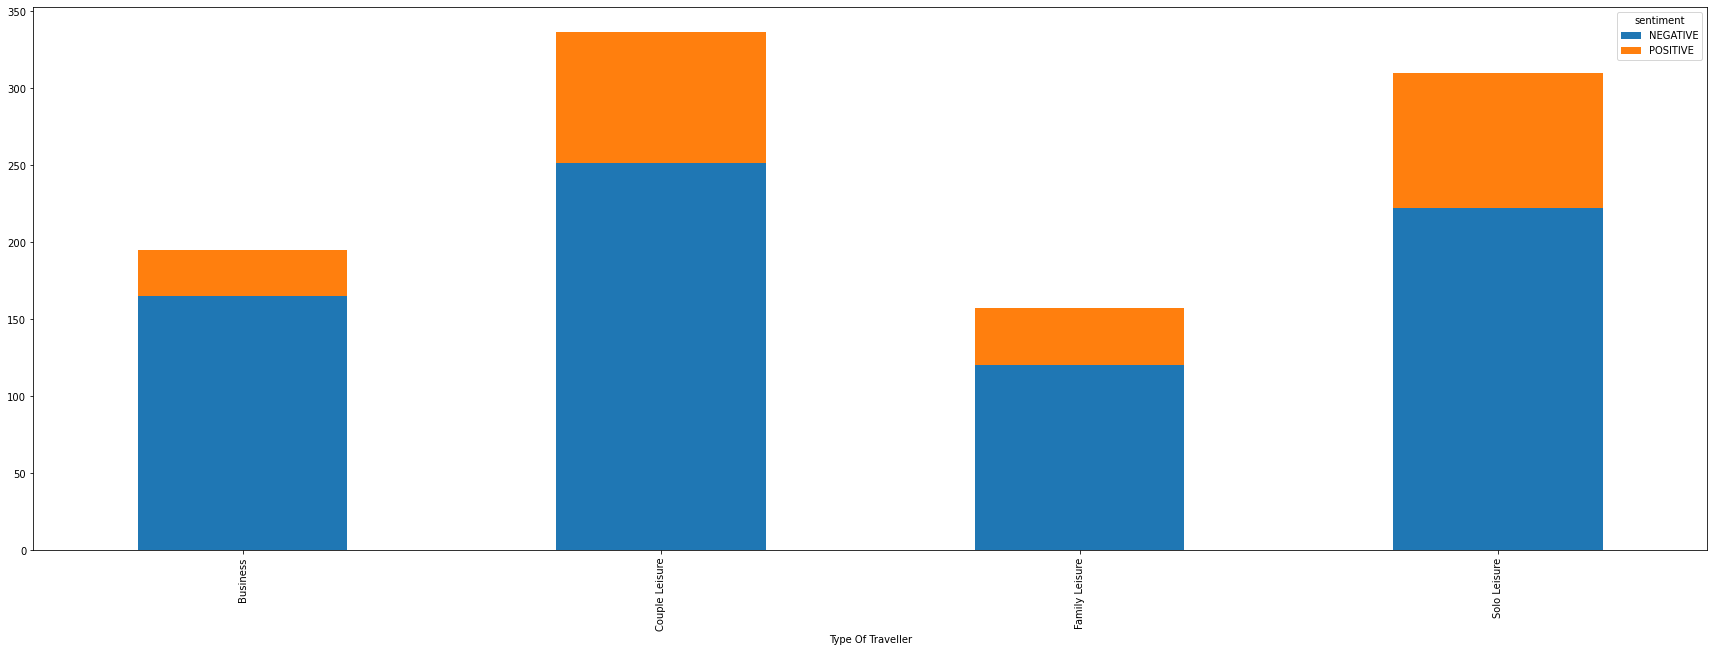

In [25]:
df.groupby('Type Of Traveller')['sentiment'].value_counts().unstack().plot.bar(stacked=True, figsize=(30,10));

<h3> Analyze Reviews 

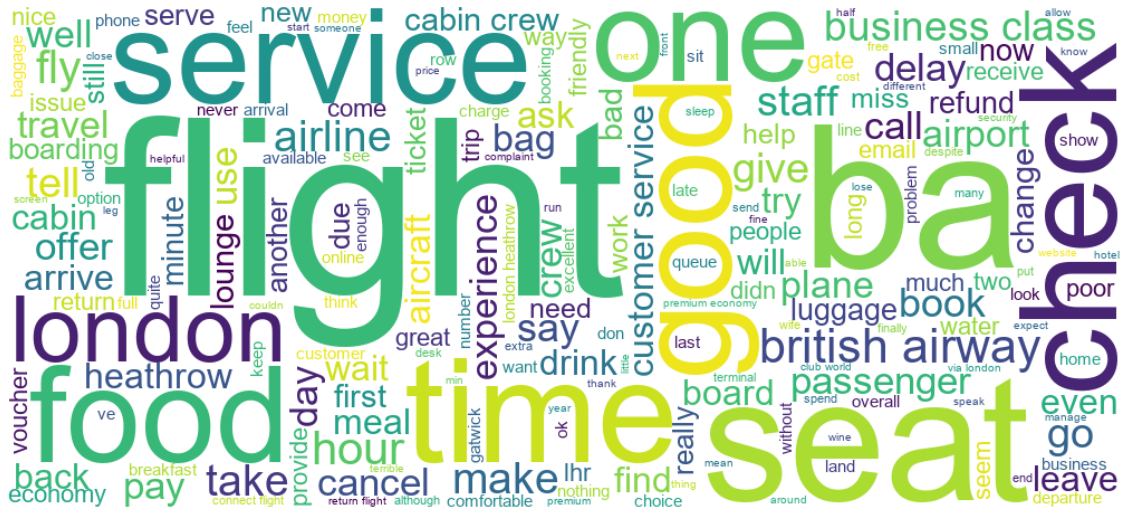

<Figure size 432x288 with 0 Axes>

In [47]:
lemmatized_word = []

for i in df['lemmatized_sentence'] :
    a = i.split(' ')
    for x in a:
        lemmatized_word.append(x)
        
string = (" ").join(lemmatized_word)

wc = WordCloud(width = 1000, 
               height = 450, 
               background_color = 'white',
               font_path='arial'
              ).generate(string)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig("WordCloud.jpg")

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer='word',
    min_df=10,
    stop_words='english',
    lowercase=True,
    token_pattern='[a-zA-Z0-9]{3,}'
)

data_vectorized = vectorizer.fit_transform(df['lemmatized_sentence'])

In [67]:
data_dense = data_vectorized.todense()

print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  4.317582417582417 %


In [77]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components=4,
    max_iter=10,
    learning_method='online',
    random_state=100,
    batch_size=128,
    n_jobs= -1,
    evaluate_every=-1
)

lda_output = lda_model.fit(data_vectorized)

print(lda_model) 

LatentDirichletAllocation(learning_method='online', n_components=4, n_jobs=-1,
                          random_state=100)


In [78]:
lda_output = lda_model.transform(data_vectorized)
lda_output

array([[0.00254115, 0.71255706, 0.00248514, 0.28241665],
       [0.00301472, 0.00306823, 0.08111952, 0.91279752],
       [0.2866932 , 0.70283301, 0.00512474, 0.00534906],
       ...,
       [0.00287951, 0.74680856, 0.002817  , 0.24749493],
       [0.01080936, 0.96707539, 0.01090078, 0.01121447],
       [0.88253362, 0.00339542, 0.00340214, 0.11066882]])

In [79]:
import numpy as np

topics = ["Topic" + str(i) for i in range(lda_model.n_components)]
docs = ["Doc" + str(i) for i in range(len(df))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topics, index=docs)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.head(15)

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0.00,0.71,0.00,0.28,1
Doc1,0.00,0.00,0.08,0.91,3
Doc2,0.29,0.70,0.01,0.01,1
Doc3,0.00,0.84,0.00,0.16,1
Doc4,0.00,0.99,0.00,0.01,1
Doc5,0.01,0.90,0.08,0.01,1
Doc6,0.98,0.01,0.01,0.01,0
Doc7,0.02,0.95,0.02,0.02,1
Doc8,0.00,0.72,0.00,0.27,1
Doc9,0.00,0.92,0.00,0.08,1


In [80]:
df_document_topic.shape

(1000, 5)

In [81]:
topics_ = df_document_topic['dominant_topic'].tolist()
df['topic'] = topics_
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,...,reviews,Verified,Not Verified,all_reviews,text_clean,lemmatized_text,lemmatized_sentence,sentiment,confidence,topic
0,Solo Leisure,Business Class,Miami to Dublin via London Heathrow,August 2023,1.0,3.0,2.0,1.0,1.0,1.0,...,"✅ Trip Verified | I had a flight from Miami, F...",1,0,"I had a flight from Miami, Florida to Dublin, ...","[had, flight, from, miami, florida, to, dublin...","[have, flight, from, miami, florida, to, dubli...",have flight from miami florida to dublin irela...,NEGATIVE,0.997876,1
1,Business,Business Class,Prague to San Francisco via London,September 2023,1.0,3.0,3.0,NaN,1.0,1.0,...,✅ Trip Verified | We started our day with BA ...,1,0,We started our day with BA in Prague. The flig...,"[we, started, our, day, with, ba, in, prague, ...","[we, start, our, day, with, ba, in, prague, th...",we start our day with ba in prague the flight ...,NEGATIVE,0.997121,3
2,Business,Economy Class,London to Glasgow,September 2023,1.0,1.0,1.0,1.0,1.0,1.0,...,✅ Trip Verified | I fly British Airways weekl...,1,0,I fly British Airways weekly not because I wan...,"[fly, british, airways, weekly, not, because, ...","[fly, british, airways, weekly, not, because, ...",fly british airways weekly not because want to...,NEGATIVE,0.998861,1
3,Family Leisure,Economy Class,San Diego to Marseille via London,August 2023,3.0,2.0,3.0,3.0,1.0,1.0,...,Not Verified | Everything was ok until our co...,0,1,Everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, be, ok, until, our, connect, flig...",everything be ok until our connect flight in l...,NEGATIVE,0.999183,1
4,Business,Premium Economy,Hamburg to Las Vegas via London,August 2023,2.0,2.0,2.0,3.0,1.0,NaN,...,Not Verified | My initial flight was cancelle...,0,1,My initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, hours, p...","[my, initial, flight, be, cancel, hour, prior,...",my initial flight be cancel hour prior the fli...,NEGATIVE,0.954525,1


In [82]:
print('Log Likelyhood', lda_model.score(data_vectorized))
print('Perplexity', lda_model.perplexity(data_vectorized))

print(lda_model.get_params())

Log Likelyhood -311644.1427502475
Perplexity 439.48828750479436
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [75]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,416
1,1,328
2,3,224
3,2,32


In [76]:
df_topic_keywords = pd.DataFrame(lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topics

df_topic_keywords

,able,absolute,absolutely,accept,acceptable,access,accommodation,account,act,actually,...,wouldn,write,wrong,yang,year,yes,yesterday,york,young,zero
Topic0,12.645663,2.207461,3.389880,5.027546,9.198295,18.543699,0.261079,0.597358,2.485553,19.791098,...,0.292696,6.677683,0.277053,15.844369,32.400744,5.509411,0.547502,15.909320,6.379958,1.388651
Topic1,47.680990,3.034929,15.998998,29.952097,0.349933,4.912236,15.395707,13.859137,6.266110,11.155912,...,20.598375,12.234107,24.029617,0.255533,45.222316,5.359359,5.209833,13.411267,0.356997,11.944224
Topic2,4.210415,6.074538,3.522887,1.593395,5.558207,0.271713,0.287068,0.265477,0.288065,0.333125,...,0.288596,10.550710,0.277637,0.261999,33.476848,5.327250,1.715208,0.267957,8.274098,1.827748
Topic3,7.939739,2.163088,13.039305,0.432102,3.848089,6.098182,0.932836,0.284600,3.252213,13.757098,...,14.524271,0.319877,11.047597,0.282277,36.177229,1.534403,4.183698,0.320386,3.974235,2.465817
